# The Psychological Toll of Social Media on Mental Health of Young Adults

## Importing Libraries

In [786]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [787]:
data = pd.read_csv("smmh.csv")

In [788]:
data.head()

,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,...,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?",Unnamed: 20
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,...,5,2,5,2,3,2,5.0,4,5,NaN
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,...,4,5,4,5,1,1,5.0,4,5,NaN
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,...,2,5,4,3,3,1,4.0,2,5,NaN
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,...,3,5,3,5,1,2,4.0,3,2,NaN
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,...,4,5,5,3,3,3,4.0,4,1,NaN


In [789]:
data.shape


(514, 21)

## Preprocessing Data

In [790]:
data.rename(columns = {'1. What is your age?':'Age','2. Gender':'Sex','3. Relationship Status':'Relationship Status',
                       '4. Occupation Status':'Occupation',
                       '5. What type of organizations are you affiliated with?':'Affiliations',
                       '6. Do you use social media?':'Social Media User?',
                       '7. What social media platforms do you commonly use?':'Platforms Used',
                       '8. What is the average time you spend on social media every day?':'Time Spent',
                       '9. How often do you find yourself using Social media without a specific purpose?':'ADHD Q1',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'ADHD Q2',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Anxiety Q1',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'ADHD Q3',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Anxiety Q2',
                       '14. Do you find it difficult to concentrate on things?':'ADHD Q4',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Self Esteem Q1',
                       '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Self Esteem Q2',
                       '17. How often do you look to seek validation from features of social media?':'Self Esteem Q3',
                       '18. How often do you feel depressed or down?':'Depression Q1',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Depression Q2',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Depression Q3' },inplace=True)

In [791]:
titles = list(data.columns)
titles

['Age',
 'Sex',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Time Spent',
 'ADHD Q1',
 'ADHD Q2',
 'Anxiety Q1',
 'ADHD Q3',
 'Anxiety Q2',
 'ADHD Q4',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3',
 'Unnamed: 20']

In [792]:
#rearranging ADHD and anxiety question columns so that they are sequential

titles[10], titles[11] = titles[11], titles[10]
titles[11], titles[13] = titles[13], titles[11]
titles[12], titles[13] = titles[13], titles[12]
data = data[titles]
titles

['Age',
 'Sex',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Time Spent',
 'ADHD Q1',
 'ADHD Q2',
 'ADHD Q3',
 'ADHD Q4',
 'Anxiety Q1',
 'Anxiety Q2',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3',
 'Unnamed: 20']

In [793]:
gender = set(data.get("Sex"))
gender

{'Female',
 'Male',
 'NB',
 'Non binary ',
 'Non-binary',
 'Nonbinary ',
 'There are others???',
 'Trans',
 'unsure '}

In [794]:
data.drop(data.loc[data['Sex'] =='There are others???'].index, inplace=True)
data.replace('Non-binary','Others', inplace=True)
data.replace('Nonbinary ','Others', inplace=True)
data.replace('NB','Others', inplace=True)
data.replace('unsure ','Others', inplace=True)
data.replace('Non binary ','Others', inplace=True)
data.replace('Trans','Others', inplace=True)

In [795]:
gender = set(data.get("Sex"))
gender

{'Female', 'Male', 'Others'}

In [796]:
data.loc[382,"Age"]

np.float64(26.7)

In [797]:
data['Age'] = data['Age'].astype('int')

In [798]:
data = data.drop('Unnamed: 20', axis=1)

In [799]:
data.loc[382,"Age"]

np.int64(26)

In [800]:
#taking data of people age below 30 years
data = data[data['Age'] <= 30]

In [801]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 0 to 513
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  424 non-null    int64  
 1   Sex                  424 non-null    object 
 2   Relationship Status  424 non-null    object 
 3   Occupation           424 non-null    object 
 4   Affiliations         401 non-null    object 
 5   Social Media User?   424 non-null    object 
 6   Platforms Used       424 non-null    object 
 7   Time Spent           424 non-null    object 
 8   ADHD Q1              424 non-null    int64  
 9   ADHD Q2              424 non-null    int64  
 10  ADHD Q3              424 non-null    int64  
 11  ADHD Q4              424 non-null    int64  
 12  Anxiety Q1           424 non-null    int64  
 13  Anxiety Q2           424 non-null    int64  
 14  Self Esteem Q1       424 non-null    int64  
 15  Self Esteem Q2       424 non-null    int64  


In [802]:
Affiliations = set(data.get("Affiliations"))
data['Affiliations'] = data['Affiliations'].fillna('Unknown')
Affiliations


{'Company',
 'Company, Private',
 'Corporate',
 'Educational institution',
 'Goverment',
 'Other (please specify)',
 'Private',
 'School',
 'School, Company',
 'School, N/A',
 'School, Private',
 'School, University',
 'School, University, Private',
 'Student',
 'University',
 'University, Company',
 'University, Company, Goverment',
 'University, Company, Private',
 'University, Goverment',
 'University, Goverment, Private',
 'University, N/A',
 'University, Private',
 nan}

In [803]:
data.describe()

,Age,ADHD Q1,ADHD Q2,ADHD Q3,ADHD Q4,Anxiety Q1,Anxiety Q2,Self Esteem Q1,Self Esteem Q2,Self Esteem Q3,Depression Q1,Depression Q2,Depression Q3
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,423.000000,424.000000,424.000000
mean,22.033019,3.613208,3.424528,3.429245,3.384434,2.632075,3.702830,2.898585,2.742925,2.483491,3.439716,3.259434,3.250000
std,2.805574,1.052483,1.291530,1.144291,1.279348,1.259108,1.236326,1.419752,1.059661,1.247110,1.243193,1.225673,1.441942
min,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000
50%,22.000000,4.000000,4.000000,3.000000,3.500000,3.000000,4.000000,3.000000,3.000000,2.000000,4.000000,3.000000,3.000000
75%,23.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000
max,30.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [804]:
data.median(numeric_only = True)

Age               22.0
ADHD Q1            4.0
ADHD Q2            4.0
ADHD Q3            3.0
ADHD Q4            3.5
Anxiety Q1         3.0
Anxiety Q2         4.0
Self Esteem Q1     3.0
Self Esteem Q2     3.0
Self Esteem Q3     2.0
Depression Q1      4.0
Depression Q2      3.0
Depression Q3      3.0
dtype: float64

In [805]:
#setting scores of 3,4 and 5 to 0.
data.loc[data['Self Esteem Q2'] == 3, 'Self Esteem Q2'] = 0
data.loc[data['Self Esteem Q2'] == 4, 'Self Esteem Q2'] = 0
data.loc[data['Self Esteem Q2'] == 5, 'Self Esteem Q2'] = 0
#Setting scores of '1' to '4' and '2' to '2'.
data.loc[data['Self Esteem Q2'] == 1, 'Self Esteem Q2'] = 4
data.loc[data['Self Esteem Q2'] == 2, 'Self Esteem Q2'] = 2

In [806]:
data.tail(2)

,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,ADHD Q1,ADHD Q2,ADHD Q3,ADHD Q4,Anxiety Q1,Anxiety Q2,Self Esteem Q1,Self Esteem Q2,Self Esteem Q3,Depression Q1,Depression Q2,Depression Q3
512,23,Female,Single,University Student,Other (please specify),Yes,"Instagram, Snapchat, YouTube, LinkedIn",Between 1 and 2 hours,3,1,2,1,1,1,5,0,3,2.0,2,2
513,23,Female,Married,Employed full-time,Other (please specify),Yes,"Instagram, YouTube, What's app",Between 2 and 3 hours,2,1,2,1,1,1,1,2,2,NaN,3,1


In [807]:
# Convert ADHD, Anxiety, Self Esteem, and Depression columns to numeric, coercing errors
ADHD = ['ADHD Q1', 'ADHD Q2', 'ADHD Q3', 'ADHD Q4']
data[ADHD] = data[ADHD].apply(pd.to_numeric, errors='coerce')

Anxiety = ['Anxiety Q1', 'Anxiety Q2']
data[Anxiety] = data[Anxiety].apply(pd.to_numeric, errors='coerce')


SelfEsteem = ['Self Esteem Q1', 'Self Esteem Q2', 'Self Esteem Q3']
data[SelfEsteem] = data[SelfEsteem].apply(pd.to_numeric, errors='coerce')

Depression = ['Depression Q1', 'Depression Q2', 'Depression Q3']
data[Depression] = data[Depression].apply(pd.to_numeric, errors='coerce')

# Now sum the scores to create the new columns
data['ADHD Score'] = data[ADHD].sum(axis=1)
data['Anxiety Score'] = data[Anxiety].sum(axis=1)
data['Self Esteem Score'] = data[SelfEsteem].sum(axis=1)
data['Depression Score'] = data[Depression].sum(axis=1)

# Sum all the individual scores to create the Total Score column
Total = ['ADHD Score', 'Anxiety Score', 'Self Esteem Score', 'Depression Score']
data['Total Score'] = data[Total].sum(axis=1)

# Deleting question columns and timestamp columns as they are no longer used
data.drop(data.iloc[:, 8:20], inplace=True, axis=1)


# Print the first few rows to check the changes
data.head()
# data.columns

,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score
0,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,18,4,4,14.0,40.0
1,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,15,7,10,14.0,46.0
2,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,11,6,4,11.0,32.0
3,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,12,6,11,9.0,38.0
4,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,17,9,6,9.0,41.0


In [808]:
def map_score(score):
    if score < 40:
        return 0
    elif score >= 40:
        return 1

data['Outcome'] = data['Total Score'].apply(lambda score:map_score(score)) 
data['Outcome'] = data['Outcome'].astype('int64')


In [809]:
data.shape

(424, 14)

In [810]:
data.describe()

,Age,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Outcome
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,22.033019,13.851415,6.334906,6.410377,9.941038,36.537736,0.398585
std,2.805574,3.704715,2.015568,2.758436,2.923584,8.575543,0.490185
min,13.000000,4.000000,2.000000,2.000000,3.000000,15.000000,0.000000
25%,21.000000,11.000000,5.000000,4.000000,8.000000,30.000000,0.000000
50%,22.000000,14.000000,6.000000,6.000000,10.000000,37.000000,0.000000
75%,23.000000,17.000000,8.000000,8.000000,12.000000,42.250000,1.000000
max,30.000000,20.000000,10.000000,14.000000,15.000000,58.000000,1.000000


In [811]:
data.head(2)

,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Outcome
0,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,18,4,4,14.0,40.0,1
1,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,15,7,10,14.0,46.0,1


# Data Visualization

In [812]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 0 to 513
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  424 non-null    int64  
 1   Sex                  424 non-null    object 
 2   Relationship Status  424 non-null    object 
 3   Occupation           424 non-null    object 
 4   Affiliations         424 non-null    object 
 5   Social Media User?   424 non-null    object 
 6   Platforms Used       424 non-null    object 
 7   Time Spent           424 non-null    object 
 8   ADHD Score           424 non-null    int64  
 9   Anxiety Score        424 non-null    int64  
 10  Self Esteem Score    424 non-null    int64  
 11  Depression Score     424 non-null    float64
 12  Total Score          424 non-null    float64
 13  Outcome              424 non-null    int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 49.7+ KB


<Axes: ylabel='Total Score'>

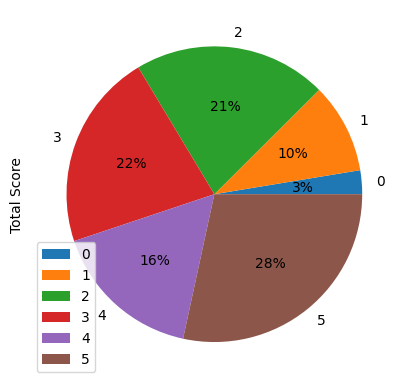

In [843]:
# Lets Understand the distribution of Data for participants and their time on Social Media 

data.groupby(['Time Spent']).sum().plot(kind='pie', y='Total Score',autopct='%1.0f%%')

<Axes: xlabel='Time Spent', ylabel='Mean ADHD Score'>

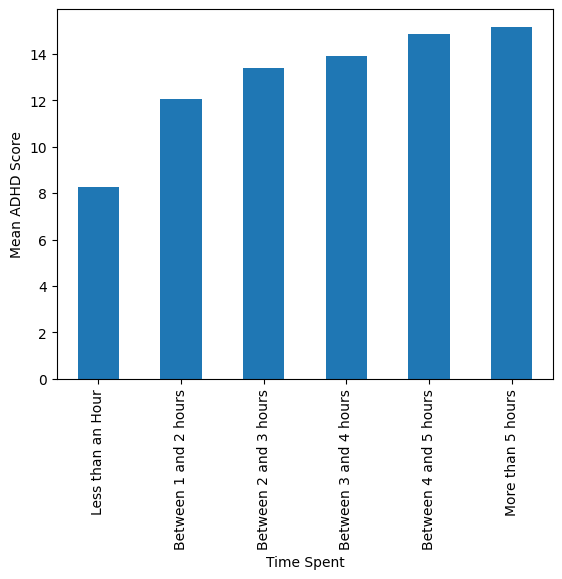

In [815]:
#Let's see the mean ADHD score of each Time group of participants
data.groupby('Time Spent')['ADHD Score'].mean().sort_values(ascending=True).plot.bar(ylabel = 'Mean ADHD Score')

<Axes: xlabel='Time Spent', ylabel='Mean Anxiety Score'>

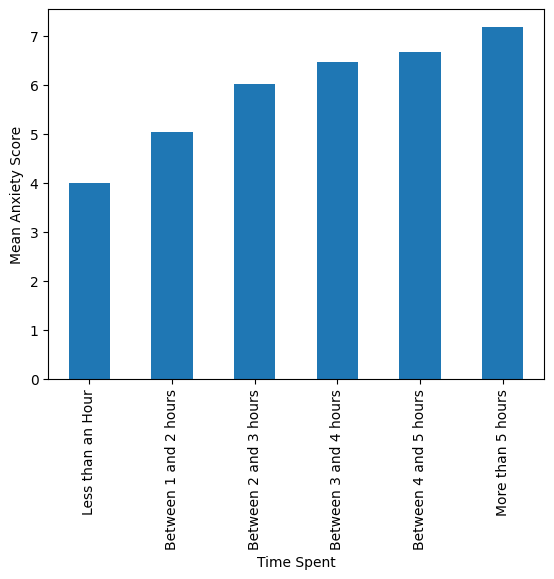

In [816]:
#Let's see the mean ADHD score of each Time group of participants
data.groupby('Time Spent')['Anxiety Score'].mean().sort_values(ascending=True).plot.bar(ylabel = 'Mean Anxiety Score')

<Axes: xlabel='Time Spent', ylabel='Mean Self Esteem Score'>

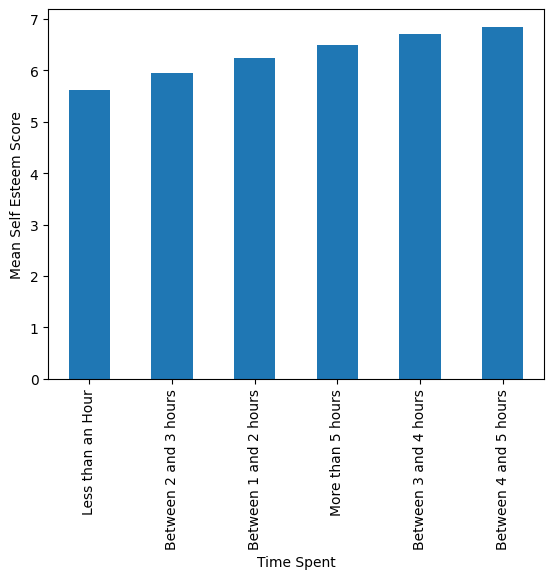

In [817]:
#Let's see the mean ADHD score of each Time group of participants
data.groupby('Time Spent')['Self Esteem Score'].mean().sort_values(ascending=True).plot.bar(ylabel = 'Mean Self Esteem Score')

<Axes: xlabel='Time Spent', ylabel='Mean Depression Score'>

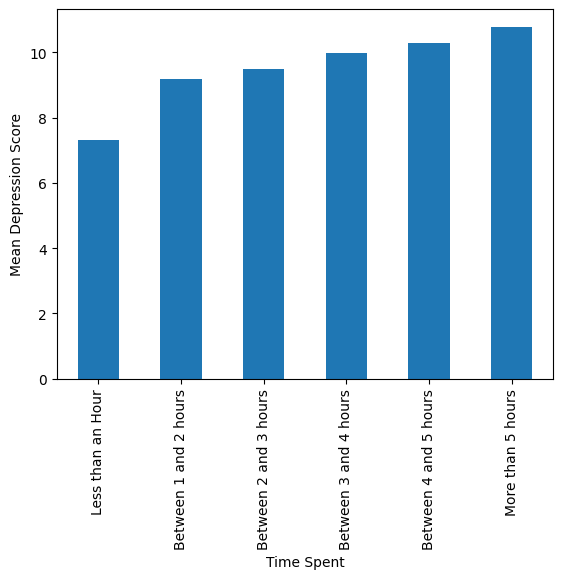

In [818]:
#Let's see the mean ADHD score of each Time group of participants
data.groupby('Time Spent')['Depression Score'].mean().sort_values(ascending=True).plot.bar(ylabel = 'Mean Depression Score')

<Axes: xlabel='Time Spent', ylabel='Mean Total Score'>

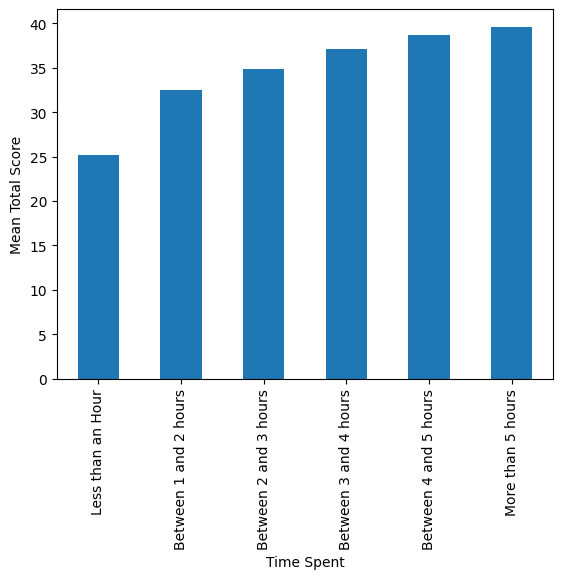

In [819]:
#Let's see the mean ADHD score of each Time group of participants
data.groupby('Time Spent')['Total Score'].mean().sort_values(ascending=True).plot.bar(ylabel = 'Mean Total Score')

In [820]:
timeSpent = set(data.get("Time Spent"))
timeSpent

{'Between 1 and 2 hours',
 'Between 2 and 3 hours',
 'Between 3 and 4 hours',
 'Between 4 and 5 hours',
 'Less than an Hour',
 'More than 5 hours'}

In [821]:
data.loc[data['Time Spent'] == 'Less than an Hour', 'Time Spent'] = 0
data.loc[data['Time Spent'] == 'Between 1 and 2 hours', 'Time Spent'] = 1
data.loc[data['Time Spent'] == 'Between 2 and 3 hours', 'Time Spent'] = 2
data.loc[data['Time Spent'] == 'Between 3 and 4 hours', 'Time Spent'] = 3
data.loc[data['Time Spent'] == 'Between 4 and 5 hours', 'Time Spent'] = 4
data.loc[data['Time Spent'] == 'More than 5 hours', 'Time Spent'] = 5

In [822]:
data['Time Spent'] = data['Time Spent'].astype('int64')

In [823]:
#setting Male to 0, Female to 1, and Others to 2.
data.loc[data['Sex'] == 'Male', 'Sex'] = 0
data.loc[data['Sex'] == 'Female', 'Sex'] = 1
data.loc[data['Sex'] == 'Others', 'Sex'] = 2
data['Sex'] = data['Sex'].astype('int64')

data.head()

,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Outcome
0,21,0,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2,18,4,4,14.0,40.0,1
1,21,1,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5,15,7,10,14.0,46.0,1
2,21,1,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3,11,6,4,11.0,32.0,0
3,21,1,Single,University Student,University,Yes,"Facebook, Instagram",5,12,6,11,9.0,38.0,0
4,21,1,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",2,17,9,6,9.0,41.0,1


In [824]:
# Selecting only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculating the correlation matrix
corr_matrix = numeric_data.corr()

# Display the correlation matrix
corr_matrix

,Age,Sex,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Outcome
Age,1.000000,0.023758,-0.060658,0.029814,-0.000706,0.046815,-0.011291,0.023923,0.043697
Sex,0.023758,1.000000,0.159430,0.017015,0.098475,0.124553,0.022665,0.078287,0.060070
Time Spent,-0.060658,0.159430,1.000000,0.362320,0.376277,0.083052,0.244401,0.355001,0.280669
ADHD Score,0.029814,0.017015,0.362320,1.000000,0.631960,0.219041,0.561883,0.842558,0.635423
Anxiety Score,-0.000706,0.098475,0.376277,0.631960,1.000000,0.285622,0.513669,0.775044,0.599153
Self Esteem Score,0.046815,0.124553,0.083052,0.219041,0.285622,1.000000,0.265371,0.573893,0.504664
Depression Score,-0.011291,0.022665,0.244401,0.561883,0.513669,0.265371,1.000000,0.789751,0.641644
Total Score,0.023923,0.078287,0.355001,0.842558,0.775044,0.573893,0.789751,1.000000,0.796413
Outcome,0.043697,0.060070,0.280669,0.635423,0.599153,0.504664,0.641644,0.796413,1.000000


In [825]:
data.head()

,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Outcome
0,21,0,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2,18,4,4,14.0,40.0,1
1,21,1,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5,15,7,10,14.0,46.0,1
2,21,1,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3,11,6,4,11.0,32.0,0
3,21,1,Single,University Student,University,Yes,"Facebook, Instagram",5,12,6,11,9.0,38.0,0
4,21,1,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",2,17,9,6,9.0,41.0,1


## Predictive Model

In [826]:
# Importing Libraries

In [827]:
data.drop(data.iloc[:, 2:7], inplace = True, axis = 1)

In [828]:
data.head()

,Age,Sex,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Outcome
0,21,0,2,18,4,4,14.0,40.0,1
1,21,1,5,15,7,10,14.0,46.0,1
2,21,1,3,11,6,4,11.0,32.0,0
3,21,1,5,12,6,11,9.0,38.0,0
4,21,1,2,17,9,6,9.0,41.0,1


In [829]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

standardizer = StandardScaler()

In [830]:
#Splitting up the data into "Train" and "Test". 80% train, 20% test.
X = data.drop(['Outcome'], axis = 1)
y = data['Outcome']
X = standardizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2,random_state=42)

## Logistic Regression

In [831]:
#Create Logistic regression model
model = LogisticRegression()

In [832]:
# Call LinearRegression() to predict.
model.fit(X_train, y_train)

LogisticRegression()

In [833]:
predicted= model.predict(X_test)
accuracy= model.score(X_test,y_test)


cm = metrics.confusion_matrix(y_test, predicted)

print(cm)
print(accuracy_score(y_test,predicted))
print(accuracy)

[[56  0]
 [ 0 29]]
1.0
1.0


In [834]:
print("Predicted Values using Logistic Regression: ", predicted)

Predicted Values using Logistic Regression:  [0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1]


In [835]:
# Model Accuracy
print('Accuracy score using the Logistic regression model: ', accuracy*100,'%')

Accuracy score using the Logistic regression model:  100.0 %
